In [7]:
import xarray as xr
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
ds = xr.open_dataset('../../data/output/Peru_C0_20160901-20170831.nc')


<xarray.Dataset>
Dimensions:       (lat: 1, lon: 1, time: 8760)
Coordinates:
  * time          (time) datetime64[ns] 2016-09-01 ... 2017-08-31T23:00:00
  * lat           (lat) float64 -8.966
  * lon           (lon) float64 -77.63
Data variables:
    HGT           (lat, lon) float64 ...
    MASK          (lat, lon) float64 ...
    SLOPE         (lat, lon) float64 ...
    ASPECT        (lat, lon) float64 ...
    T2            (time, lat, lon) float64 ...
    RH2           (time, lat, lon) float64 ...
    U2            (time, lat, lon) float64 ...
    PRES          (time, lat, lon) float64 ...
    G             (time, lat, lon) float64 ...
    RRR           (time, lat, lon) float64 ...
    N             (time, lat, lon) float64 ...
    RAIN          (time, lat, lon) float64 ...
    SNOWFALL      (time, lat, lon) float64 ...
    LWin          (time, lat, lon) float64 ...
    LWout         (time, lat, lon) float64 ...
    H             (time, lat, lon) float64 ...
    LE            (time, lat, lon) float64 ...
    B             (time, lat, lon) float64 ...
    QRR           (time, lat, lon) float64 ...
    surfMB        (time, lat, lon) float64 ...
    MB            (time, lat, lon) float64 ...
    Q             (time, lat, lon) float64 ...
    SNOWHEIGHT    (time, lat, lon) float64 ...
    TOTALHEIGHT   (time, lat, lon) float64 ...
    TS            (time, lat, lon) float64 ...
    ALBEDO        (time, lat, lon) float64 ...
    LAYERS        (time, lat, lon) float64 ...
    ME            (time, lat, lon) float64 ...
    intMB         (time, lat, lon) float64 ...
    EVAPORATION   (time, lat, lon) float64 ...
    SUBLIMATION   (time, lat, lon) float64 ...
    CONDENSATION  (time, lat, lon) float64 ...
    DEPOSITION    (time, lat, lon) float64 ...
    REFREEZE      (time, lat, lon) float64 ...
    subM          (time, lat, lon) float64 ...
    Z0            (time, lat, lon) float64 ...
    surfM         (time, lat, lon) float64 ...
Attributes:
    Start_from_restart_file:                    False
    Stake_evaluation:                           False
    WRF_simulation:                             False
    Compression_level:                          2
    Slurm_use:                                  False
    Full_fiels:                                 False
    Force_use_TP:                               False
    Force_use_N:                                False
    Tile_of_glacier_of_interest:                False
    Time_step_input_file_seconds:               3600
    Max_layers:                                 200
    Z_measurment_height:                        2.0
    Stability_correction:                       Ri
    Albedo_method:                              Oerlemans98
    Densification_method:                       Boone
    Penetrating_method:                         Bintanja95
    Roughness_method:                           Moelg12
    Saturation_water_vapour_method:             Sonntag90
    Initial_snowheight:                         0.0
    Initial_snow_layer_heights:                 0.0
    Initial_glacier_height:                     30.0
    Initial_glacier_layer_heights:              0.5
    Initial_top_density_snowpack:               380.0
    Initial_bottom_density_snowpack:            680.0
    Temperature_bottom:                         268.0
    Const_init_temp:                            0.2
    Center_snow_transfer_function:              1.0
    Spread_snow_transfer_function:              1
    Multiplication_factor_for_RRR_or_SNOWFALL:  1.0
    Minimum_snow_layer_height:                  0.001
    Minimum_snowfall:                           0.001
    Remesh_method:                              log_profile
    First_layer_height_log_profile:             0.01
    Layer_stretching_log_profile:               1.2
    Merge_max:                                  1
    Density_threshold_merging:                  5
    Temperature_threshold_merging:              0.01
    Density_fresh_snow:                        

In [4]:
stakes_loc_file = '../../data/input/Peru/loc_stakes1.csv'
stakes_data_file = '../../data/input/Peru/data_stakes_peru_year1.csv'
df_stakes_loc = pd.read_csv(stakes_loc_file, delimiter='\t', na_values='-9999')
df_stakes_data = pd.read_csv(stakes_data_file, delimiter='\t', index_col='TIMESTAMP', na_values='-9999')
df_stakes_data.index = pd.to_datetime(df_stakes_data.index)
df_stakes_data = df_stakes_data.cumsum(axis=0)
df_stakes_data = df_stakes_data-30


In [65]:
TOTALHEIGHT_mod = ds['TOTALHEIGHT'][:,0,0].to_dataframe()
df = TOTALHEIGHT_mod['TOTALHEIGHT']
df = TOTALHEIGHT_mod-30
df2 = df.loc[df_stakes_data.index]
df

,lat,lon,TOTALHEIGHT
time,,,
2016-09-01 00:00:00,-38.965561,-107.629135,-1.187960e-09
2016-09-01 01:00:00,-38.965561,-107.629135,-1.187956e-09
2016-09-01 02:00:00,-38.965561,-107.629135,-7.227271e-09
2016-09-01 03:00:00,-38.965561,-107.629135,-2.856392e-08
2016-09-01 04:00:00,-38.965561,-107.629135,-2.856392e-08
...,...,...,...
2017-08-31 19:00:00,-38.965561,-107.629135,-6.136885e+00
2017-08-31 20:00:00,-38.965561,-107.629135,-6.136885e+00
2017-08-31 21:00:00,-38.965561,-107.629135,-6.136885e+00


In [76]:
tot_h_mod = df2['TOTALHEIGHT'].values
tot_h_obs = df_stakes_data['S18'].values
tot_h_obs

array([-0.15 , -1.35 , -3.12 , -3.32 , -3.65 , -3.755, -4.255, -4.645,
       -4.885, -5.485, -5.945])

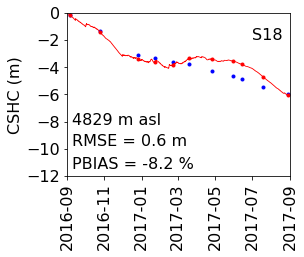

In [99]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(df_stakes_data['S18'],'b.',lw=0.4, label='Measured')
ax.plot(df['TOTALHEIGHT'],'r-',lw=0.8, label='Modelled')
ax.plot(df2['TOTALHEIGHT'],'r.',lw=0.4, label='Modelled')
#    ax.set_title(stake_names[i])
ax.set_ylim(-12,0)
ax.set_yticks(np.arange(-12, 2, 2))
ax.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-09-01'))
ax.xaxis.set_tick_params(which='major',rotation=90)
ax.set_ylabel('CSHC (m)')

mod_sta = tot_h_mod
obs_sta = tot_h_obs
corf_pearson = np.corrcoef(obs_sta,mod_sta)
corf_pearson = np.round(corf_pearson[1,0], decimals=3)
rms_stake = np.round(sqrt(mean_squared_error(obs_sta, mod_sta)),decimals=1)
pbias = (np.round(100 *  (np.sum( mod_sta - obs_sta)/np.sum(obs_sta)),decimals=1))


ax.text(pd.Timestamp("2017-07-01"), -2, 'S18')
ax.text(pd.Timestamp("2016-09-10"), -11.5, 'PBIAS ='+' '+str(pbias)+' '+'%')
ax.text(pd.Timestamp("2016-09-10"), -9.8, 'RMSE ='+' '+str(rms_stake)+' '+'m')
ax.text(pd.Timestamp("2016-09-10"), -8.2, str(df_stakes_loc['elev'][17])+' '+'m asl')


font_f = 16
plt.rc('font', size=font_f)          # controls default text sizes
plt.rc('axes', titlesize=font_f)     # fontsize of the axes title
plt.rc('axes', labelsize=font_f)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_f)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_f)    # legend fontsize

fig.savefig('out/val_point.pdf',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1, format='pdf')